# 2.2: Simple Linear Regression (foodtruck)

In this tutorial, you'll be implement a very simple linear regression model using the data on food truck sales.

The file foodtruck.csv only has 2 columns
- population : representing a population of the city (in the unit of 10,000s people) the food truck is in
- profit : the profit (in the unit of \$ 10,000) that the  food truck made in that city

The goal of the model is to predict a profit that the food truck will make given a population of  acity

## Importing the libraries

In [1]:
!pip install pandas-profiling
!pip install ipywidgets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.3/356.3 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27079 sha256=2f5d5e923360a9c215347b3744c2b893676b22054c2af060dc492b483baacf85
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin
  Attempting uninstall: wordcloud
    Found existing installation: wordcloud 1.8.2.2
    Uninstalling wordc

In [2]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [3]:
# df = pd.read_csv('./data/foodtruck.csv')
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_VLG-QVuEQFaABcsXxWmG1ASV-SVcEoEvoFDH8pUN4A/gviz/tq?tqx=out:csv&sheet=foodtruck')

In [4]:
df.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [5]:
from ydata_profiling import ProfileReport
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#Exercise: Selecting X and y to be appropriate feature/target
X = df[['population']]
y = df['profit']
###################

Question: why are we using [[ ]] for X but not for y?

Answer: X should be formatted as a matrix with possibly multiple columns (multiple features), while y will always be a vector or a single column (for single-target regression).

In [12]:
X

,population
0,6.1101
1,5.5277
2,8.5186
3,7.0032
4,5.8598
...,...
92,5.8707
93,5.3054
94,8.2934
95,13.3940


In [13]:
y

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
        ...   
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: profit, Length: 97, dtype: float64

## TODO: Splitting the dataset into the Training set and Test set

We will be using 70-30 split for this case

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 99)

## TODO: Training the Simple Linear Regression model on the Training set

In [15]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## TODO: Predicting the Test set results

In [16]:
y_pred = model.predict(X_test)

## TODO: Visualising the Training set results

In [17]:
y_pred_train = model.predict(X_train)

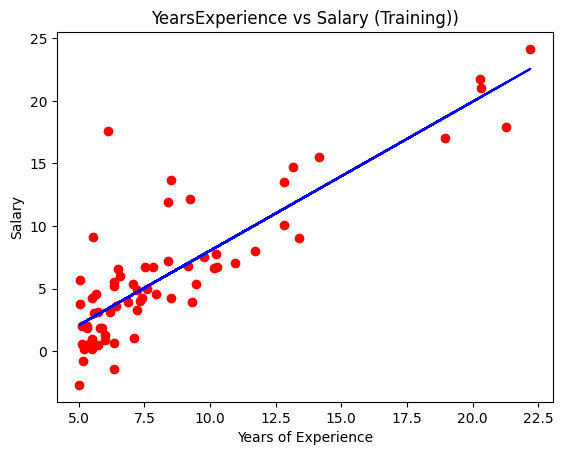

In [18]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_pred_train, color = 'blue')
plt.title('YearsExperience vs Salary (Training))')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## TODO: Visualising the Test set results

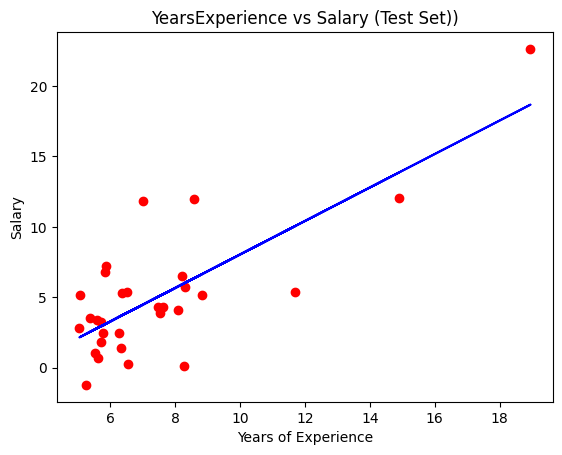

In [19]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, y_pred, color = 'blue')
plt.title('YearsExperience vs Salary (Test Set))')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## TODO: Evaluating how the model performs

In [20]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5969814313033257

Other error metrics if it's of interests

In [21]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2.289339228649636
MSE: 8.572941907013734
RMSE: 2.9279586586927304


In [22]:
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['population'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([1.18966915]),
 'rank_': 1,
 'singular_': array([33.98487943]),
 'intercept_': -3.860807207472713}